  #      Movies Recommendation System

### Importing necessary libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity


### Loading dataset

In [53]:
movies_df=pd.read_csv("IMDB_10000.csv" )
movies_df


,title,year,certificate,runtime,genre,desc,rating,votes
0,Freddy,2022,UA 16+,124 min,"Drama, Mystery, Thriller",The lines between love and obsession blur in t...,7.9,"16,441"
1,An Action Hero,2022,U,130 min,Action,Youth Icon. Superstar. Action Hero. At the age...,8.1,"15,690"
2,Kantara,2022,UA,148 min,"Action, Adventure, Drama",It involves culture of Kambala and Bhootha Kol...,8.7,"78,358"
3,Khakee: The Bihar Chapter,2022–,UA 13+,45 min,"Action, Crime, Drama",As a righteous cop pursues a merciless crimina...,8.3,"4,464"
4,Drishyam 2,2022,UA,140 min,"Crime, Drama, Mystery",A gripping tale of an investigation and a fami...,8.6,"18,743"
...,...,...,...,...,...,...,...,...
9995,Kisan Aur Bhagwan,1974,NaN,142 min,"Action, Comedy, Drama",NaN,NaN,NaN
9996,Aadmi Sadak Ka,1977,NaN,138 min,"Drama, Family",NaN,NaN,NaN
9997,Nadodi Mannan,1958,NaN,220 min,"Action, Adventure, Comedy",NaN,NaN,NaN
9998,Njan Marykutty,2018,U,126 min,Drama,NaN,NaN,NaN


In [41]:
movies_df.shape

(10000, 8)

In [43]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        10000 non-null  object 
 1   year         9736 non-null   object 
 2   certificate  6560 non-null   object 
 3   runtime      7938 non-null   object 
 4   genre        9867 non-null   object 
 5   desc         8959 non-null   object 
 6   rating       8959 non-null   float64
 7   votes        8959 non-null   object 
dtypes: float64(1), object(7)
memory usage: 625.1+ KB


## Data Cleaning

In [58]:
movies_df.isnull().sum()

title             0
year            264
certificate    3440
runtime        2062
genre           133
desc           1041
rating         1041
votes          1041
dtype: int64

In [60]:
movies_df = movies_df.dropna(subset=['title', 'year', 'certificate', 'runtime', 'genre', 'desc', 'rating', 'votes'])
movies_df

,title,year,certificate,runtime,genre,desc,rating,votes
0,Freddy,2022,UA 16+,124 min,"Drama, Mystery, Thriller",The lines between love and obsession blur in t...,7.9,"16,441"
1,An Action Hero,2022,U,130 min,Action,Youth Icon. Superstar. Action Hero. At the age...,8.1,"15,690"
2,Kantara,2022,UA,148 min,"Action, Adventure, Drama",It involves culture of Kambala and Bhootha Kol...,8.7,"78,358"
3,Khakee: The Bihar Chapter,2022–,UA 13+,45 min,"Action, Crime, Drama",As a righteous cop pursues a merciless crimina...,8.3,"4,464"
4,Drishyam 2,2022,UA,140 min,"Crime, Drama, Mystery",A gripping tale of an investigation and a fami...,8.6,"18,743"
...,...,...,...,...,...,...,...,...
8953,Pyaar Kii Ye Ek Kahaani,2010–2021,PG,24 min,"Fantasy, Romance",The story of a young village girl who abandons...,8.4,17
8954,Hero Gayab Mode On,2020–2021,UA 13+,23 min,"Action, Adventure, Fantasy","Ghasitaram, under pressure from his wife, deci...",6.6,23
8955,Aakashavaani,2021,UA 16+,124 min,Drama,The Nath family consists of Retired Commission...,5.5,39
8956,Aladdin - Naam Toh Suna Hoga,2018–2021,U,22 min,Fantasy,A wanderer/revolutionary is a dead ringer for ...,8.1,110


In [62]:
movies_df.drop_duplicates()

,title,year,certificate,runtime,genre,desc,rating,votes
0,Freddy,2022,UA 16+,124 min,"Drama, Mystery, Thriller",The lines between love and obsession blur in t...,7.9,"16,441"
1,An Action Hero,2022,U,130 min,Action,Youth Icon. Superstar. Action Hero. At the age...,8.1,"15,690"
2,Kantara,2022,UA,148 min,"Action, Adventure, Drama",It involves culture of Kambala and Bhootha Kol...,8.7,"78,358"
3,Khakee: The Bihar Chapter,2022–,UA 13+,45 min,"Action, Crime, Drama",As a righteous cop pursues a merciless crimina...,8.3,"4,464"
4,Drishyam 2,2022,UA,140 min,"Crime, Drama, Mystery",A gripping tale of an investigation and a fami...,8.6,"18,743"
...,...,...,...,...,...,...,...,...
8953,Pyaar Kii Ye Ek Kahaani,2010–2021,PG,24 min,"Fantasy, Romance",The story of a young village girl who abandons...,8.4,17
8954,Hero Gayab Mode On,2020–2021,UA 13+,23 min,"Action, Adventure, Fantasy","Ghasitaram, under pressure from his wife, deci...",6.6,23
8955,Aakashavaani,2021,UA 16+,124 min,Drama,The Nath family consists of Retired Commission...,5.5,39
8956,Aladdin - Naam Toh Suna Hoga,2018–2021,U,22 min,Fantasy,A wanderer/revolutionary is a dead ringer for ...,8.1,110


## Visual representation

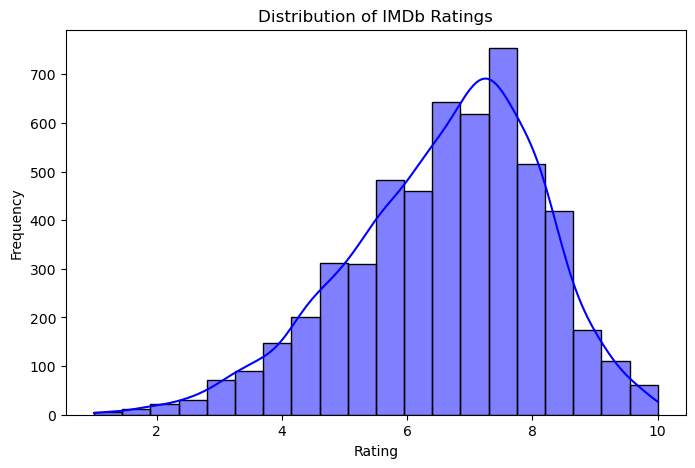

In [65]:
# Plot Histogram of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(movies_df["rating"].dropna(), bins=20, kde=True, color="blue")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


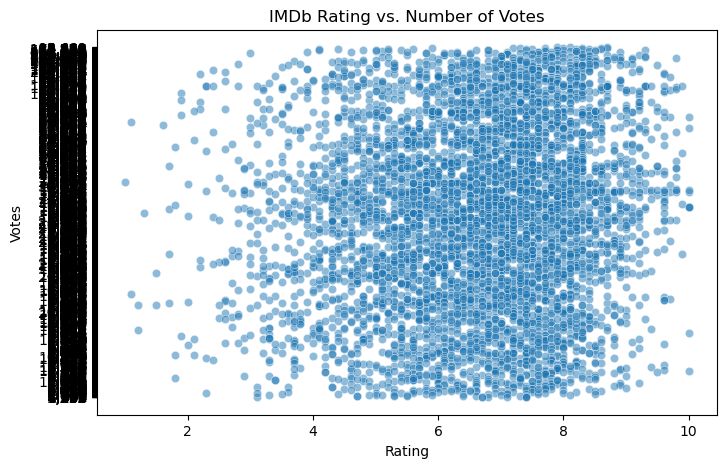

In [66]:
# Plot Scatter Plot: Rating vs. Votes
plt.figure(figsize=(8, 5))
sns.scatterplot(x=movies_df["rating"], y=movies_df["votes"], alpha=0.5)
plt.title("IMDb Rating vs. Number of Votes")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.show()


In [68]:
# Fill missing values
movies_df['desc'] = movies_df['desc'].fillna('')
movies_df['genre'] = movies_df['genre'].fillna('')


In [69]:

# Combine genre and description for text processing
movies_df['features'] = movies_df['genre'] + " " + movies_df['desc']

In [73]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['features'])

In [75]:

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [77]:
# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in movies_df['title'].values:
        return f"Movie '{title}' not found in dataset."

    idx = movies_df[movies_df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]  # Top 5 similar movies
    movie_indices = [i[0] for i in sim_scores]

    
    return movies_df.iloc[movie_indices][['title', 'genre', 'rating']]

In [79]:
get_recommendations("RRR")

"Movie 'RRR' not found in dataset."